# Decision Tree

## Exercises
    Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

## Imports:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import acquire
import prepare

from sklearn.model_selection import train_test_split
#import this for the decision tree!
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

## Highlights

############# Markdown parser in Jupyter notebooks ##################

<div class="alert alert-block alert-info"> <b>NOTE</b>
 Use blue boxes for Tips and notes.
</div>

<div class="alert alert-block alert-success"> 
 Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe   you decide to use green boxes for related links from each section of a notebook. 
</div>

<div class="alert alert-block alert-warning"> 
 Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. 
</div>

<div class="alert alert-block alert-danger">
 In general, just avoid the red boxes. 
</div>

<div class="alert alert-block alert-success">
Load your DATA
</div>

In [3]:
titanic_df = acquire.get_titanic_data()

csv file found and loaded


In [4]:
titanic_df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


<div class="alert alert-block alert-success">
Prepare it** (Clean it)
</div>

In [5]:
# Clean the new dataset using the new function called prep_titanic
titanic_df = prepare.prep_titanic(titanic_df)

<div class="alert alert-block alert-success">
Split it your data
</div>

In [6]:
# Split my data
train, validate, test = prepare.split_function(titanic_df, 'survived')

<div class="alert alert-block alert-success">
Check your data after PREPARE and SPLIT
</div>


In [7]:
# Check your train data
train.head(2)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  534 non-null    int64  
 1   survived      534 non-null    int64  
 2   pclass        534 non-null    int64  
 3   sex           534 non-null    object 
 4   sibsp         534 non-null    int64  
 5   parch         534 non-null    int64  
 6   fare          534 non-null    float64
 7   embarked      533 non-null    object 
 8   alone         534 non-null    int64  
 9   sex_male      534 non-null    uint8  
 10  embarked_Q    534 non-null    uint8  
 11  embarked_S    534 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 43.3+ KB


<div class="alert alert-block alert-success">
You can remove 'Sex' and 'Embarked' as they have been encoded to 'sex_male' and 'embarked_Q and _S'. Also you want to drop 'survived' and passenger_id becuase 
</div>

In [9]:
#Dropped all the columns that contained a type 'object'
train = train.select_dtypes(exclude=['object'])
train.head(2)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0


In [10]:
#Dropped all the columns that contained a type 'object'
validate = validate.select_dtypes(exclude=['object'])
validate.head(2)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
176,176,0,3,3,1,25.4667,0,1,0,1
372,372,0,3,0,0,8.0500,1,1,0,1


In [11]:
#Dropped all the columns that contained a type 'object'
test = test.select_dtypes(exclude=['object'])
test.head(2)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
561,561,0,3,0,0,7.8958,1,1,0,1
641,641,1,1,0,0,69.3000,1,0,0,0


### 1a. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode) When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [12]:
titanic_df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [13]:
#look at my train
train.head(2)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0


In [14]:
titanic_df.survived.value_counts().idxmax() # 0 = NO survivers

0

> Baseline is No Survived (0)

In [15]:
#set baseline
titanic_df['baseline']= titanic_df.survived.value_counts().idxmax()
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


In [16]:
# calculate baseline accuracy
# baseline_accuracy = (train.servived == 0)
baseline_accuracy = 329 / (329+205)
baseline_accuracy

0.6161048689138576

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [17]:
train.head(2)

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0


<div class="alert alert-block alert-success">
Lets drop 'passenger_id' because it doesn't add any value to the data. Also, we need to remove the 'survived' column because is our TARGET.
</div>

<div class="alert alert-block alert-warning"> 
# Also, lets convert train to X_train.
</div>

In [18]:
# Lets drop 'passenger_id' because it doesn't add any value to the data. Also, we need to remove the 'survived' column because is our TARGET.
# Also, lets convert train to X_train. 
X_train = train.drop(columns = ['passenger_id', 'survived'])
X_train.head(2)

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0


In [19]:
# 'X' variables are DataFrames
# X will be our features
# Now we still need to drop the passenger_id and survived columns for validate.
X_validate = validate.drop(columns = ['passenger_id', 'survived'])
X_validate.head(2)

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
176,3,3,1,25.4667,0,1,0,1
372,3,0,0,8.0500,1,1,0,1


In [20]:
# 'X' variables are DataFrames
# X will be our features
# Now we still need to drop the passenger_id and survived columns for test.
X_test = test.drop(columns = ['passenger_id', 'survived'])
X_test.head(2)

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
561,3,0,0,7.8958,1,1,0,1
641,1,0,0,69.3000,1,0,0,0


<div class="alert alert-block alert-info"> <b>NOTE</b>
Lets find the 'y' for train, validate and test.
 </div>

In [21]:
# Set a target
target = 'survived'

In [22]:
# 'y' variable are series
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

<div class="alert alert-block alert-info"> <b>NOTE</b>
 Making the object
 </div>

In [23]:
# Making the object
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

<div class="alert alert-block alert-info"> <b>NOTE</b>
 fit the object
 building our model on our train values
 </div>

In [24]:
# fit the object
# building our model on our train values
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Predict
clf.predict(X_train)[:5]
print(f'The train predict: {clf.predict(X_train)[:5]}')

The train predict: [0 1 0 1 0]


In [26]:
# Transform the object
# score on my train data
clf.score(X_train, y_train)
print(f'The decision tree classifier train score: {clf.score(X_train, y_train)}')

The decision tree classifier train score: 0.9456928838951311


### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [27]:
# The y_predict for train
y_pred = clf.predict(X_train)

<div class="alert alert-block alert-success"> 
   CONFUSION MATRIX
</div>

In [28]:
# CONFUSION MATRIX
conf = confusion_matrix(y_train, y_pred)
conf

array([[327,   2],
       [ 27, 178]])

<div class="alert alert-block alert-info"> <b>PRO TIP: </b>
Let's make it look nice!
</div>

In [29]:
# Label the columns with a 0 and 1
labels = sorted(y_train.unique())
labels

[0, 1]

In [30]:
# Convert the confusion matrix into a DataFrame
pd.DataFrame(conf)

,0,1
0,327,2
1,27,178


In [31]:
# Print the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       329
           1       0.99      0.87      0.92       205

    accuracy                           0.95       534
   macro avg       0.96      0.93      0.94       534
weighted avg       0.95      0.95      0.94       534



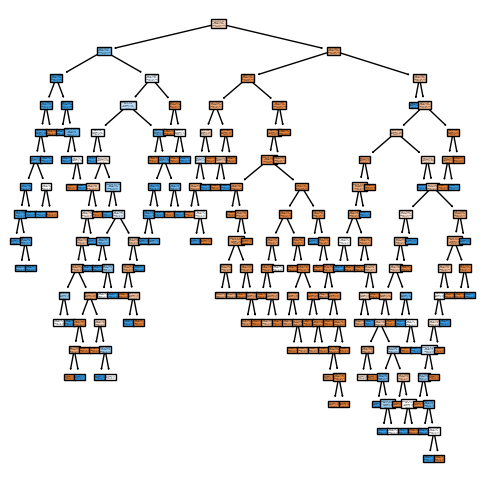

In [32]:
#see the tree that was built
#plot_tree
plt.figure(figsize=(6,6))
plot_tree(clf, #our fitted object
         feature_names=X_train.columns, #puts in our features for the questions
          class_names=clf.classes_.astype(str), #enters the selected class
          filled=True #colors our leaves and branches based on the class
         )
plt.show()

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [33]:
# Let's continue to clean our table
pd.DataFrame(conf, index = [str(label) + '_actual' for label in labels], # Added an index and gave it a the name of 'actual'
             columns = [str(label) + '_predict' for label in labels]) # Added a columns name of 'predict'

,0_predict,1_predict
0_actual,327,2
1_actual,27,178


<div class="alert alert-block alert-info"> <b> </b>
Positive case = survived
</div>

In [34]:
conf.ravel()

array([327,   2,  27, 178])

In [35]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(327, 2, 27, 178)

In [36]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [37]:

print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.9456928838951311

True Positive Rate/Sensitivity/Recall/Power: 0.8682926829268293
False Positive Rate/False Alarm Ratio/Fall-out: 0.0060790273556231
True Negative Rate/Specificity/Selectivity: 0.993920972644377
False Negative Rate/Miss Rate: 0.13170731707317074

Precision/PPV: 0.9888888888888889
F1 Score: 0.9246753246753248

Support (0): 205
Support (1): 329


### 5. Run through steps 2-4 using a different max_depth value.

In [38]:
#for one
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.7921348314606742

In [39]:
#for lots
for x in range(1,20):
#     print(x)
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.79
for depth of  2, the accuracy is 0.79
for depth of  3, the accuracy is 0.82
for depth of  4, the accuracy is 0.82
for depth of  5, the accuracy is 0.83
for depth of  6, the accuracy is 0.86
for depth of  7, the accuracy is 0.86
for depth of  8, the accuracy is 0.9
for depth of  9, the accuracy is 0.91
for depth of 10, the accuracy is 0.92
for depth of 11, the accuracy is 0.93
for depth of 12, the accuracy is 0.93
for depth of 13, the accuracy is 0.94
for depth of 14, the accuracy is 0.94
for depth of 15, the accuracy is 0.95
for depth of 16, the accuracy is 0.95
for depth of 17, the accuracy is 0.95
for depth of 18, the accuracy is 0.95
for depth of 19, the accuracy is 0.95


### 6. Which model performs better on your in-sample data?

In [40]:
print(f"Accuracy: {accuracy}\n")

Accuracy: 0.9456928838951311



> Compare to the baseline accuarcy depths greater than 16 perform better

### 7. Which model performs best on your out-of-sample data, the validate set?

In [41]:
scores_all = []

for x in range(1,20):

    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = tree.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])
    

In [42]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.head()

,max_depth,train_acc,val_acc
0,1,0.792135,0.775281
1,2,0.792135,0.775281
2,3,0.818352,0.792135
3,4,0.820225,0.792135
4,5,0.833333,0.735955


In [43]:
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc

In [44]:
scores_df.sort_values('diff').head()

,max_depth,train_acc,val_acc,diff
0,1,0.792135,0.775281,0.016854
1,2,0.792135,0.775281,0.016854
2,3,0.818352,0.792135,0.026217
3,4,0.820225,0.792135,0.028090
5,6,0.859551,0.775281,0.084270


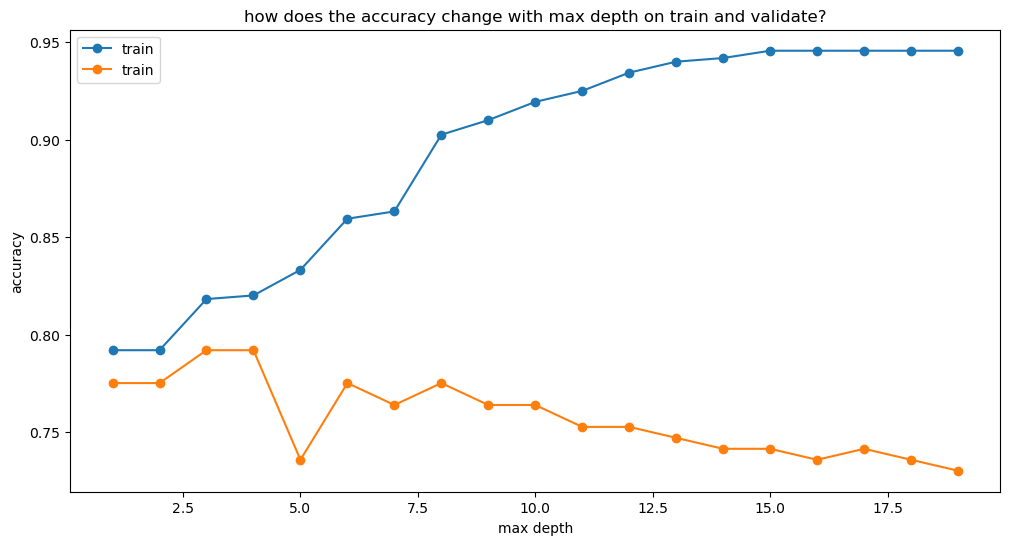

In [45]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='train', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()